<h1 style="text-align: center;">
<div style="color:rgb(221, 3, 181); font-size: 200%">Spotify Analysis</div>

# Section 1: Dataset

## What dataset am I using?

Most Streamed Spotify Songs 2023

## Why did I choose this dataset?

I chose this dataset because I knew for this project I wanted to use a dataset that I was actually passionate about. Music has always been such an influential aspect of my life, and I thought it would be really interesting to analyze some data about my favorite artists! I used the website Kaggle to find this dataset. I didn't know what I wanted to do from the beginning, I was just openly exploring the website for any datasets that caught my eye. After I found a few, I started to eliminate some based off their lower usability scores. From there, I just continued to narrow the choices down until I got to the one I believed would be most interesting/had the most analysis opportunities. 

## Loading the Spotify Dataset

In [732]:
import pandas as pd
df = pd.read_csv("spotify-2023.csv", encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Section 2: Exploratory Data Analysis

## Intro

I wanted to use a combination of different descriptive stats to answer some overall and then some more specific questions about my data. Before I get into the statistics I decided to analyze, I'd like to mention my big three first, as I'll be using them throughout this section. My big three are my top three favorite artists (in general and then also on my spotify wrapped!): Taylor Swift, Beyonce, and Lana Del Rey. First I wanted to look at size: the 10 songs that had the highest danceability rankings, and then the song with the largest danceability ranking for each of my big three. I also wanted to look at the total number of streams, and what percentage of that each of my big three took up. However, when I ran the numbers, the total was crazy large, and wouldn't convert to a numeric value. At first I thought the size was the issue, but then I realized I just had to clean up the streams column, and I made a new column (streams2) in the dataframe for efficency. Then I was able to find the total. Additionally, I did a comparison for the mean; I chose to find how many of my big three's songs were above the overall mean streams per song. Finally, I used some groupby to discover the real big three (the top three streamed artist according to the dataset). 

## Code

In [733]:
#Had to fix streams column
Streams_Numeric = pd.to_numeric(df["streams"],errors="coerce")
df["streams2"] = Streams_Numeric

### Part 1: Top Danceability


##### Find the 10 songs with the highest danceability ranking

In [734]:
df.nlargest(10, 'danceability_%')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams2
595,Peru,"Ed Sheeran, Fireboy DML",2,2021,12,23,2999,0,261286503,60,...,G,Minor,96,71,42,57,0,8,9,2.612865e+08
224,Players,Coi Leray,1,2022,11,30,4096,6,335074782,118,...,F#,Major,95,62,52,3,0,5,16,3.350748e+08
250,The Real Slim Shady,Eminem,1,2000,1,1,20763,27,1424589568,81,...,F,Minor,95,78,66,3,0,4,6,1.424590e+09
321,CAIRO,"Karol G, Ovy On The Drums",2,2022,11,13,2418,26,294352144,52,...,F,Minor,95,43,69,47,0,9,31,2.943521e+08
423,Super Freaky Girl,Nicki Minaj,1,2022,8,12,4827,0,428685680,104,...,D,Major,95,91,89,6,0,31,24,4.286857e+08
702,Starlight,Dave,1,2022,3,3,1856,3,229473310,29,...,G,Major,95,36,37,35,0,10,28,2.294733e+08
876,Ai Preto,"L7nnon, DJ Biel do Furduncinho, Bianca",3,2022,6,3,894,4,176103902,28,...,F#,Major,95,83,57,54,0,10,25,1.761039e+08
268,Slut Me Out,NLE Choppa,1,2022,4,22,816,4,190490915,21,...,F#,Minor,94,71,61,12,0,53,42,1.904909e+08
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,B,Minor,93,68,65,42,0,12,25,1.195664e+07
266,Shorty Party,"Cartel De Santa, La Kelly",2,2023,3,4,432,12,162887075,8,...,D,Major,93,47,47,33,0,10,36,1.628871e+08


##### Find the song with the highest danceability ranking for the big three

In [735]:
#Taylor Swift variable 
Taylor = df[df["artist(s)_name"] == "Taylor Swift"]

In [736]:
Taylor.nlargest(1, 'danceability_%')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams2
933,Vigilante Shit,Taylor Swift,1,2022,10,21,1948,0,253650850,12,...,E,Minor,80,16,28,17,0,12,39,253650850.0


In [737]:
#Beyonce Variable
## The e in Beyonce's name got mixed up so this is me fixing it 
df.loc[df["artist(s)_name"] == "Beyoncï¿", "artist(s)_name"]= "Beyonce"
Beyonce = df[df["artist(s)_name"] == "Beyonce"]


In [738]:
Beyonce.nlargest(1, 'danceability_%')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams2
231,CUFF IT,Beyonce,1,2022,7,29,7842,10,595900742,215,...,G,Major,78,64,69,4,0,7,14,595900742.0


In [739]:
#Lana Del Rey Variable
Lana = df[df["artist(s)_name"] == "Lana Del Rey"]

In [740]:
Lana.nlargest(1, 'danceability_%')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams2
98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,...,C#,Minor,56,24,66,7,0,12,3,983637508.0


### Part 2: Total Streams


##### Find the total number of streams 

In [741]:
total = df["streams2"].sum()
total = int(total)
total

489458828542

##### Find the total streams for each of the big three 

In [742]:
#Taylor Swift
Taylor_total = Taylor["streams2"].sum()
Taylor_total = int(Taylor_total)
Taylor_total

14053658300

In [743]:
#Beyonce
Beyonce_total = Beyonce["streams2"].sum()
Beyonce_total = int(Beyonce_total)
Beyonce_total

1122304190

In [744]:
#Lana Del Rey
Lana_total = Lana["streams2"].sum()
Lana_total = int(Lana_total)
Lana_total

1396024922

##### Find the percentage that each of the big three totals take up of the total streams 

In [745]:
TaylorPer = Taylor_total/total
BeyoncePer = Beyonce_total/total
LanaPer = Lana_total/total
print (TaylorPer , BeyoncePer, LanaPer)

0.0287126464586675 0.002292949119628958 0.0028521804911732394


### Part 3: Mean streams

##### Find the overall average streams

In [746]:
mean = df["streams2"].mean()
mean

514137424.93907565

##### Find the average streams for the big three

In [747]:
Taylor_mean = Taylor["streams2"].mean()
Taylor_mean

413342891.1764706

In [748]:
Beyonce_mean = Beyonce["streams2"].mean()
Beyonce_mean

374101396.6666667

In [749]:
Lana_mean = Lana["streams2"].mean()
Lana_mean

465341640.6666667

None of the average streams for my big three were greater than the mean stream! Curious...

### Part 4: The Real "Top Three"

#### Make a simplified dataset

In [750]:
df2 = df[['artist(s)_name', 'streams2',]]
df2

,artist(s)_name,streams2
0,"Latto, Jung Kook",141381703.0
1,Myke Towers,133716286.0
2,Olivia Rodrigo,140003974.0
3,Taylor Swift,800840817.0
4,Bad Bunny,303236322.0
...,...,...
948,Selena Gomez,91473363.0
949,Taylor Swift,121871870.0
950,"Feid, Paulo Londra",73513683.0
951,"Feid, Sech, Jhayco",133895612.0


##### Group the artists and find the top three streamed

In [751]:
top_artist = df2.groupby("artist(s)_name").agg("sum").reset_index()
top_artist.nlargest(3, "streams2")

,artist(s)_name,streams2
572,The Weeknd,1.418555e+10
558,Taylor Swift,1.405366e+10
159,Ed Sheeran,1.390895e+10


# Section 3: Exploratory Data Visualization

## EDA Visuals 

### Taylor vs. Overall

<Axes: ylabel='Frequency'>

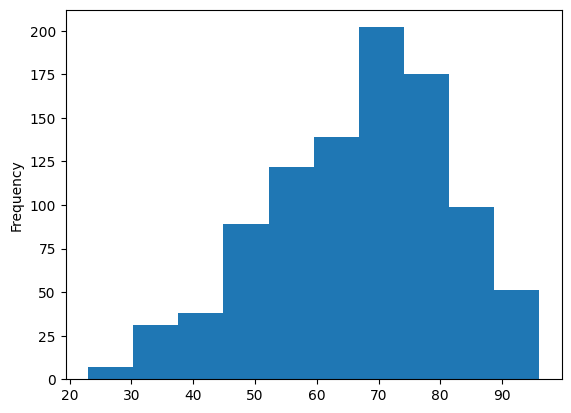

In [752]:
df["danceability_%"].plot.hist()

<Axes: ylabel='Frequency'>

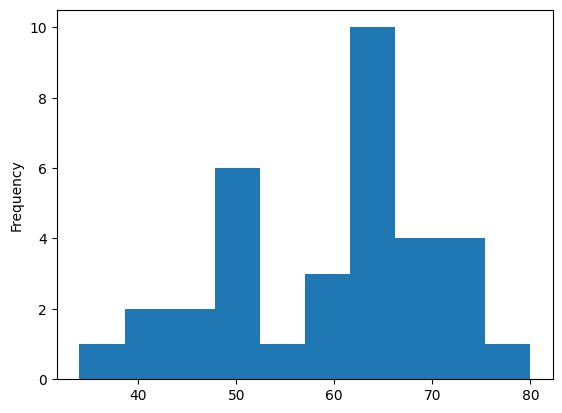

In [753]:
Taylor["danceability_%"].plot.hist()

<Axes: ylabel='Frequency'>

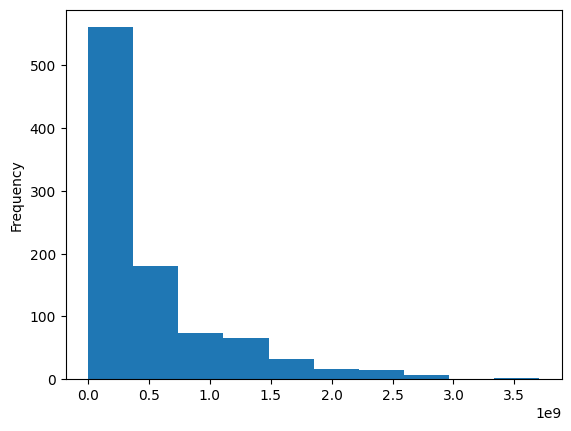

In [754]:
df["streams2"].plot.hist()

<Axes: ylabel='Frequency'>

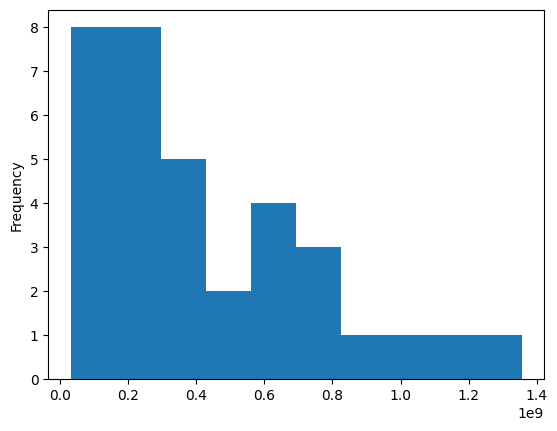

In [755]:
Taylor["streams2"].plot.hist()

### Analysis

I wanted to compare Taylor Swifts's statistics to the overall, seeing that she was in the top three streamed artist of the dataset and in my original top three favorite artists. I'm mostly going to touch on the histograms related to the streams. The descriptive statistics confused me for a little, because while Taylor's mean was lower than the average, she was still in the top three streamed artists. But after seeing the two "streams2" histograms, I understood. Taylor's streams had a positive skew, meaning, she had some higher extreme values that added to her sum, but the overall distribution was lower. You can see this through the large standard deviation as well (larger std= data is spread out from mean). Additionally, the overall streams were also positively skewed, and they had a very high extreme that contributed to the mean being higher than taylor's. 

In [756]:
#For explanation above 
Taylor["streams2"].std() 

346030654.4294117

## Data Science Visuals 

### Danceability: Best and Worst 

#### Best

<Axes: xlabel='danceability_%', ylabel='valence_%'>

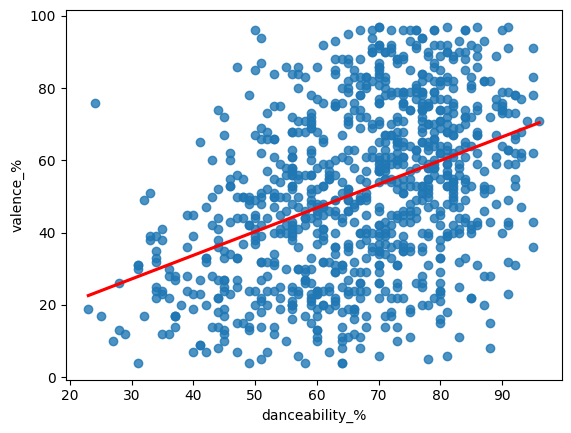

In [757]:
import seaborn as sns
sns.regplot(data=df, x="danceability_%", y="valence_%", ci=None, line_kws={'color':'red'})

#### Worst

<Axes: xlabel='danceability_%', ylabel='released_month'>

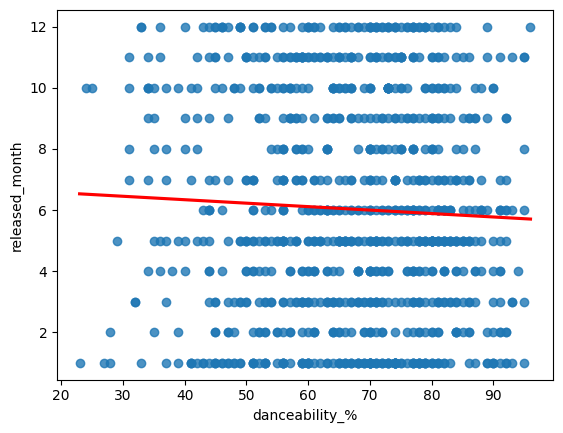

In [758]:
import seaborn as sns
sns.regplot(data=df, x="danceability_%", y="released_month", ci=None, line_kws={'color':'red'})

### Streaming: Best and Worst

#### Best

<Axes: xlabel='streams2', ylabel='released_year'>

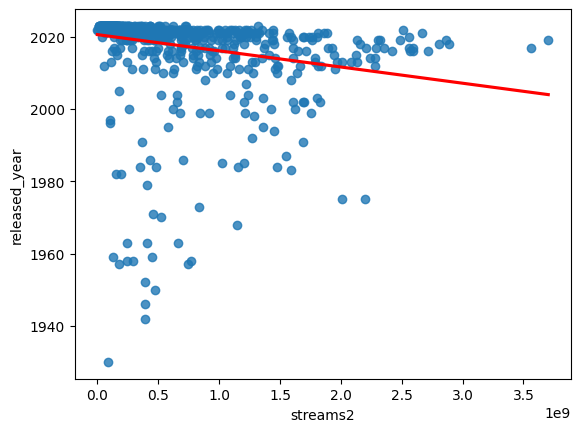

In [759]:
import seaborn as sns
sns.regplot(data=df, x="streams2", y="released_year", ci=None, line_kws={'color':'red'})

#### Worst

<Axes: xlabel='streams2', ylabel='bpm'>

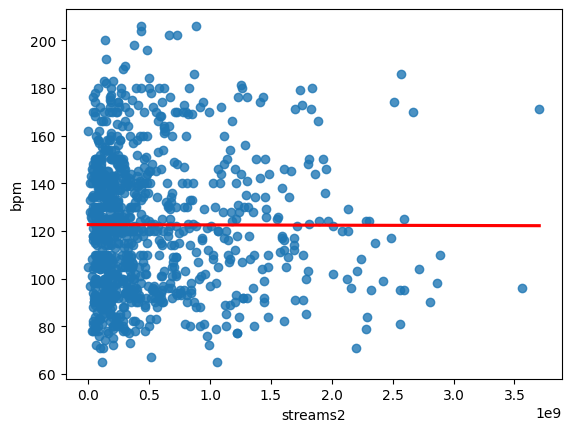

In [760]:
import seaborn as sns
sns.regplot(data=df, x="streams2", y="bpm", ci=None, line_kws={'color':'red'})

# Section 4: Data Science

## Question 1: Which numeric factors have the most and least influence on danceability? Which have the most and least for streaming? 

Because I've already done some exploratory data analysis with the danceability and the streaming columns, i thought it would be intriguing to see the most important factors that effect them. I can use the .corr() function to anaylze the correlation coefficients of the different numerical factors, calculate the regression line, and then use data visuals to confirm. 

#### Group Numerical Columns

In [761]:
numerical_columns = ["streams2", "danceability_%", "valence_%", "energy_%", "acousticness_%","instrumentalness_%", "liveness_%", "speechiness_%", "bpm", "released_year" , "released_month" , "released_day" ]

#### Correlation

In [762]:
df_numerical = df[numerical_columns]
df_numerical.corr()

,streams2,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,bpm,released_year,released_month,released_day
streams2,1.000000,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333,-0.002438,-0.230803,-0.024938,0.010598
danceability_%,-0.105457,1.000000,0.408451,0.198095,-0.236165,-0.089138,-0.077538,0.184977,-0.147095,0.187333,-0.046403,0.048951
valence_%,-0.040831,0.408451,1.000000,0.357612,-0.081907,-0.132890,0.021278,0.041081,0.041195,-0.059355,-0.118571,0.042779
energy_%,-0.026051,0.198095,0.357612,1.000000,-0.577344,-0.038547,0.117302,-0.004846,0.025794,0.095226,-0.083710,0.050545
acousticness_%,-0.004485,-0.236165,-0.081907,-0.577344,1.000000,0.042796,-0.050142,-0.022501,-0.017694,-0.124156,0.054430,-0.005788
instrumentalness_%,-0.044902,-0.089138,-0.132890,-0.038547,0.042796,1.000000,-0.045967,-0.083396,-0.001195,-0.014562,0.033985,0.019280
liveness_%,-0.048337,-0.077538,0.021278,0.117302,-0.050142,-0.045967,1.000000,-0.022525,-0.000761,-0.005819,-0.012348,0.001566
speechiness_%,-0.112333,0.184977,0.041081,-0.004846,-0.022501,-0.083396,-0.022525,1.000000,0.039260,0.133819,0.039838,-0.015826
bpm,-0.002438,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260,1.000000,-0.005334,-0.039252,-0.030177
released_year,-0.230803,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819,-0.005334,1.000000,0.076714,0.174282


#### Regression Lines

##### Best and Worst Regression Line- Danceability

In [763]:
#best
slope = (df_numerical.corr()["valence_%"]["danceability_%"])* ((df_numerical["valence_%"].std())/(df_numerical["danceability_%"].std()))
intercept = df_numerical["valence_%"].mean()  - (slope * df_numerical["danceability_%"].mean())
# Regression line
print('Y= {}(X) + {}'.format(slope, intercept))

Y= 0.655522768579668(X) + 7.5311918821704396


In [764]:
#worst
slope = (df_numerical.corr()["released_month"]["danceability_%"])* ((df_numerical["released_month"].std())/(df_numerical["danceability_%"].std()))
intercept = df_numerical["released_month"].mean()  - (slope * df_numerical["danceability_%"].mean())
# Regression line
print('Y= {}(X) + {}'.format(slope, intercept))

Y= -0.011311340188433903(X) + 6.791093760237385


##### Best and Worst Regression Line- Streams

In [765]:
#best
slope = (df_numerical.corr()["released_year"]["streams2"])* ((df_numerical["released_year"].std())/(df_numerical["streams2"].std()))
intercept = df_numerical["released_year"].mean()  - (slope * df_numerical["streams2"].mean())
# Regression line
print('Y= {}(X) + {}'.format(slope, intercept))

Y= -4.526108858136316e-09(X) + 2020.5652371264537


In [766]:
#worst
slope = (df_numerical.corr()["bpm"]["streams2"])* ((df_numerical["bpm"].std())/(df_numerical["streams2"].std()))
intercept = df_numerical["bpm"].mean()  - (slope * df_numerical["streams2"].mean())
# Regression line
print('Y= {}(X) + {}'.format(slope, intercept))

Y= -1.2066949651885207e-10(X) + 122.60243944502737


## Question 2: Which Song has the greatest combined apple/spotify playlists?

I thought it would be interesting to do some cross analysis using the data across different platforms. I can use the .loc feature to figure out which song has the most playlists when looking at apple AND spotify. Then I can look at the individual ones and compare.  

##### Simplify DataFrame

In [767]:
df3 = df[["track_name", "in_spotify_playlists", "in_apple_playlists"]]
df3

,track_name,in_spotify_playlists,in_apple_playlists
0,Seven (feat. Latto) (Explicit Ver.),553,43
1,LALA,1474,48
2,vampire,1397,94
3,Cruel Summer,7858,116
4,WHERE SHE GOES,3133,84
...,...,...,...
948,My Mind & Me,953,61
949,Bigger Than The Whole Sky,1180,4
950,A Veces (feat. Feid),573,2
951,En La De Ella,1320,29


#### Find top song

In [772]:
df3.loc[:, "combined"] = (df3["in_spotify_playlists"] +  df3["in_apple_playlists"])
top_value = df3["combined"].max()

In [769]:
top_song = df3[df3["combined"] == top_value]
top_song

,track_name,in_spotify_playlists,in_apple_playlists,combined
757,Get Lucky - Radio Edit,52898,203,53101


In [770]:
top_spotify_song = df3.nlargest(1, "in_spotify_playlists")
top_spotify_song

,track_name,in_spotify_playlists,in_apple_playlists,combined
757,Get Lucky - Radio Edit,52898,203,53101


In [771]:
top_apple_song = df3.nlargest(1, "in_apple_playlists")
top_apple_song

,track_name,in_spotify_playlists,in_apple_playlists,combined
55,Blinding Lights,43899,672,44571


# Section 5: Overall Summary

In this notebook I delved into the the discoveries of a Spotify Dataset. I used descriptive statistics to analyze my top three artists of the year, and then the top three artists overall (based off of my streams). Those two sets of three had one artist in common: Taylor Swift! Out of my big three she had the top danceability of a song, and made up the largest percentile of the total streams. For the overall, she had a large amount of top songs, as well as a variety in her streaming depending on the songs this year (high standard deviation). She also followed most of the overall trends for the dataset such as distribution of danceability and (which makes sense giving her standing), but her mean streams were lower than the overall mean. This was shown/proved again in the positive skewed histogram of Taylor's streams. 

Other than analyzing Taylor Swift, I did some more advanced data analysis for the danceability and stream factors. I wanted to see which numerical factors had the greatest/least impact on the two columns. For danceability, the best was valence, which is understandable as the more positive songs are typically the onces you to dance to. The factor with the least impact, release month, also makes some sense as my dancing doesnt fluxuate depending on the month. In contrast, the streaming factors (released year and bpm) were more suprising. However, streaming in general didn't have much correlation with any factor. For a second inquiry, I decided to focus on comparing songs across platforms. More specifically, I set out to find the top song on the combined platforms of apple and spotify, and then compare that to the top of each individual music platforms. I discovered that the the combined top and spotify top shared a song ("Get Lucky"), while apple's top song was different ("Blinding Lights"). As there are more spotify users (at least in the dataset), it had more of an influence in this analysis. In the future, it would be interesting to compare the top artist results of Spotify with those of Apple's (Apple's streaming numbers weren't provided). 
